In [11]:
import numpy as np
import matplotlib.pyplot as plt
#iradon
from skimage.transform import iradon
# median_filter
from scipy.ndimage import median_filter
from src.TORFilesReader import ToRFile
from src.AnalyticalReconstruction import AnalyticalReconstruction

In [12]:
# import file
output_path = "C:\\Users\\pedro\\OneDrive\\Ambiente de Trabalho\\all_values.tor"
ToRFile_reader = ToRFile(filepath=output_path)
ToRFile_reader.read()
listModeBody_read = ToRFile_reader.fileBodyData


In [32]:
geometry = ToRFile_reader.systemInfo
geometry.xRayProducer.setFocalSpotInitialPositionWKSystem([12.55, 0, 0])
geometry.sourcePositionAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"])

geometry.detectorSideBCoordinatesAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], listModeBody_read["IDA"].astype(np.int32))

[[[ -6.0762787 -47.95312    -4.42     ]
  [-23.709755  -72.223694   -4.42     ]
  [-22.091587  -73.39936    -4.42     ]
  ...
  [-23.709755  -72.223694   -2.42     ]
  [-22.091587  -73.39936    -2.42     ]
  [ -4.457947  -49.12891    -2.42     ]]

 [[ -6.0762787 -47.95312    29.78     ]
  [-23.709755  -72.223694   29.78     ]
  [-22.091587  -73.39936    29.78     ]
  ...
  [-23.709755  -72.223694   31.78     ]
  [-22.091587  -73.39936    31.78     ]
  [ -4.457947  -49.12891    31.78     ]]

 [[ -6.0762787 -47.95312    22.94     ]
  [-23.709755  -72.223694   22.94     ]
  [-22.091587  -73.39936    22.94     ]
  ...
  [-23.709755  -72.223694   24.94     ]
  [-22.091587  -73.39936    24.94     ]
  [ -4.457947  -49.12891    24.94     ]]

 ...

 [[ -4.759447  -47.984253  -27.22     ]
  [-21.719175  -72.73032   -27.22     ]
  [-20.069307  -73.86107   -27.22     ]
  ...
  [-21.719175  -72.73032   -25.22     ]
  [-20.069307  -73.86107   -25.22     ]
  [ -3.1094112 -49.11512   -25.22     ]]

 [

(array([[1105.,  965., 1094., ..., 1041., 1036.,  925.],
        [ 986., 1098., 1060., ..., 1075., 1029., 1072.],
        [1030., 1016., 1028., ..., 1013., 1087., 1042.],
        ...,
        [1012., 1032., 1002., ..., 1034., 1049., 1053.],
        [1091., 1035., 1039., ..., 1029., 1053., 1112.],
        [1079.,  998.,  981., ..., 1022., 1049., 1040.]]),
 array([-358.20001221, -354.61801208, -351.03601196, -347.45401184,
        -343.87201172, -340.2900116 , -336.70801147, -333.12601135,
        -329.54401123, -325.96201111, -322.38001099, -318.79801086,
        -315.21601074, -311.63401062, -308.0520105 , -304.47001038,
        -300.88801025, -297.30601013, -293.72401001, -290.14200989,
        -286.56000977, -282.97800964, -279.39600952, -275.8140094 ,
        -272.23200928, -268.65000916, -265.06800903, -261.48600891,
        -257.90400879, -254.32200867, -250.74000854, -247.15800842,
        -243.5760083 , -239.99400818, -236.41200806, -232.83000793,
        -229.24800781, -225.666

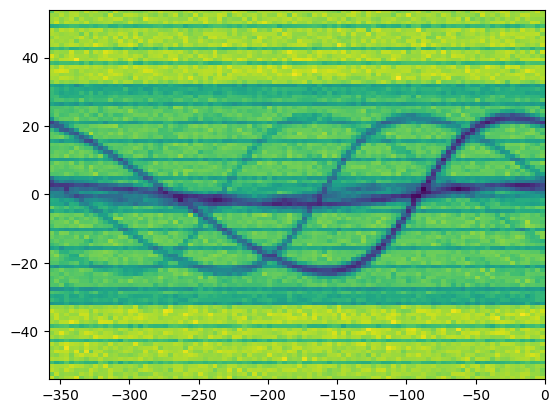

In [25]:
plt.hist2d(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], bins=100)


[[30.        30.        30.        ... 29.985197  29.985197  29.985197 ]
 [-0.        -0.        -0.        ...  0.9423164  0.9423164  0.9423164]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]
26614
6817


C:\Users\pedro\OneDrive\Documentos\GitHub\Infinity-Tomographic-Reconstruction\src\AnalyticalReconstruction\initializer.py:51: FutureWarning: 'filter' is a deprecated argument name for `iradon`. It will be removed in version 0.19. Please use 'filter_name' instead.
  self.im[:, :, k] = iradon(self.michelogram[0][:, :, k].T, theta=theta, circle=True,


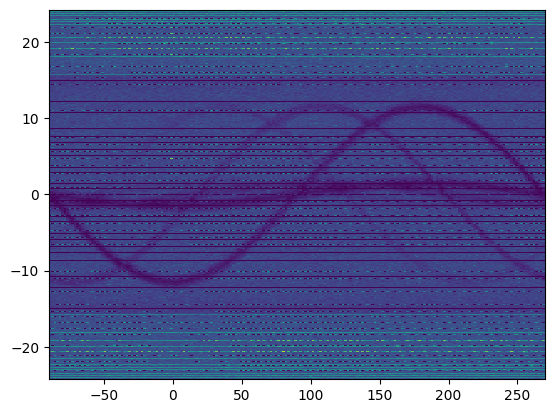

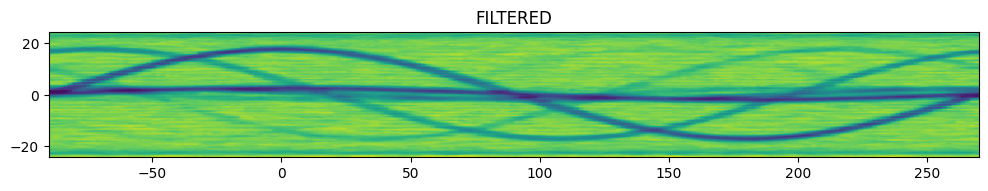

In [84]:
print(geometry._originSystemWK)
midpointFace = (geometry._verticesB[:,3] + geometry._verticesB[:,7]) / 2
analytical=AnalyticalReconstruction(initial_points=geometry.sourceCenter, end_points=geometry.centerFace, rebinning="reb")
number_bins_s =len(np.unique(analytical.sinoClass.s))


number_bins_phi =len(np.unique(analytical.sinoClass.phi))
print(number_bins_phi)
print(number_bins_s)
sino=analytical.sinoClass.projected_sinogram(bins_x=200, bins_y=480, rebining_x=1, rebining_y=1)
sino_filtered = median_filter(sino[0], 5)
sino_filtered = sino_filtered[:,80:-80]
analytical.FBP2D()

plt.figure(figsize=(12,6))
plt.title("FILTERED")

plt.imshow(sino_filtered.T, extent=[sino[1].min(), sino[1].max(), sino[2].min(), sino[2].max()])
#sino_new=sino[0].T
#sino_new=sino_new[9:51,:]
#k=0.25*np.ones([3,3])
#sino_new=signal.convolve(sino[0].T,k,mode='same',)
#im=iradon(sino[0].T, theta=sino[1][:-1], circle=True,
#       filter_name="ramp",
#       output_size=int(sino[0].shape[1]))

# im=iradon_sart(sino[0].T, theta=sino[1][:-1])
# im=analytical.im
theta = np.arange(0,360,1.8)
im=iradon(sino_filtered.T, theta=theta, circle=True,
       filter_name="ramp",
       output_size=int(np.ceil(sino[0].shape[1]*0.7)))


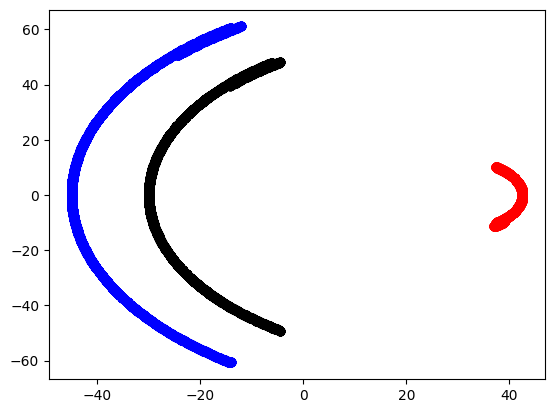

In [81]:
plt.plot(geometry.sourceCenter[:10000,0], geometry.sourceCenter[:10000,1], "ro")
plt.plot(geometry.centerFace[:10000,0], geometry.centerFace[:10000,1], "bo")
# plt.plot(geometry._originSystemWK.T[::10000,0], geometry._originSystemWK.T[::10000,1], "go")
plt.plot(geometry._verticesB[:10000,3,0], geometry._verticesB[:10000,3,1], "ko")

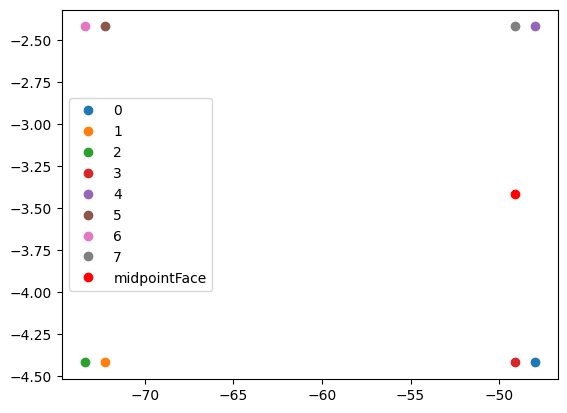

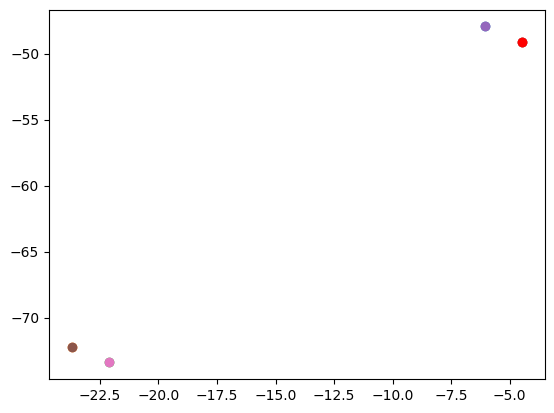

In [82]:
plt.figure()
for i in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,i,1], geometry._verticesB[0,i,2],"o" ,label=i)
    
plt.plot(midpointFace[0,1], midpointFace[0,2], "ro", label="midpointFace")
plt.legend()

plt.figure()
for j in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,j,0], geometry._verticesB[0,j,1],"o" ,label=j)

plt.plot(midpointFace[0,0], midpointFace[0,1], "ro", label="midpointFace")

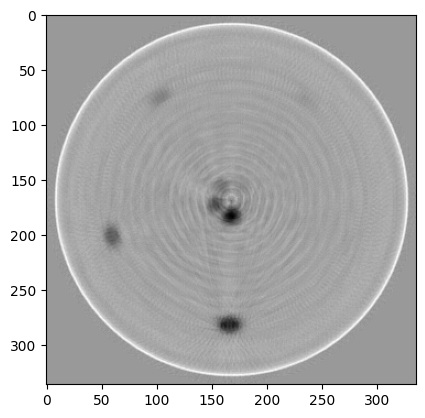

In [83]:
plt.figure()
plt.imshow(im, cmap='gray')